# Compare panel bumps
In which we do a primitive comparison to the magnitude of the bumps we see in our results, and what we expect according to the specs from the tests.
From the web page from the Fred's Leica test results (about two years ago), https://www.cv.nrao.edu/~fschwab/consub2.ex1.html:
![specs](bumpSpecs.png)

In [1]:
# let's take a look at our results
#%matplotlib notebook
from parabolas import *

# we can load the reference and bump scan smoothed results from disk
refDiffs = np.load("refDiffsSmoothed.npy")
refXs = np.load("refXsSmoothed.npy")
refYs = np.load("refYsSmoothed.npy")
bumpXs = np.load("bumpXsSmoothed.npy")
bumpYs = np.load("bumpYsSmoothed.npy")
bumpDiffs = np.load("bumpDiffsSmoothed.npy")

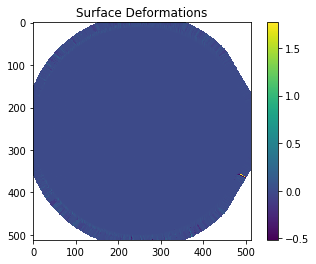

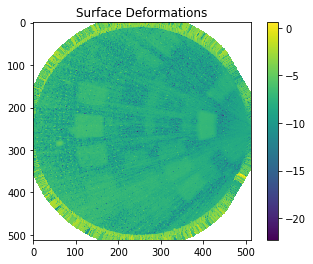

In [2]:
# let's take a look at the bumps
diffData = refDiffs - bumpDiffs
diffDataLog = np.log(np.abs(diffData))
imagePlot(diffData, "Surface Deformations")
imagePlot(diffDataLog, "Surface Deformations")

## Find relative displacement of bump at vertex
The above Surface Deformations images are along the boresight, where as we believe the specs at the top are
displacements normal to the surface, so in order to avoid complications, let's take a look at the raised
panel closest to the vertex, where these two directions are basically parallel.
We'll need to find the values at this panel, and at the surface, using the difference as the final displacement.


In [3]:
from surfaceZoom import surfaceZoom

1.9878336516212003e-05

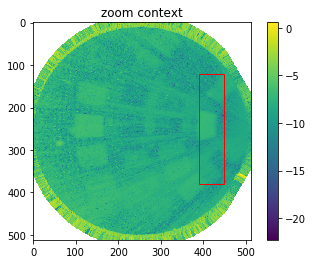

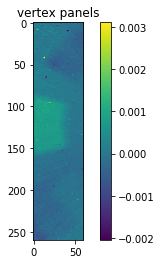

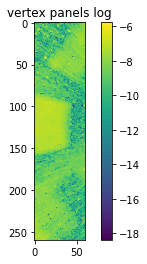

In [4]:
# first zoom into the area of interest
y = 120; x=390; h= 260; w=60;
vertexPanels = (x, y, w, h)
surfaceZoom(diffData, diffDataLog, x, y, w, h, "vertex panels")

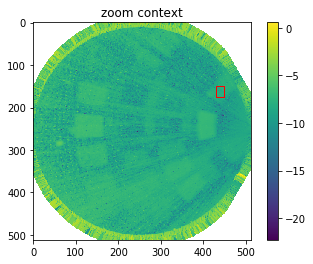

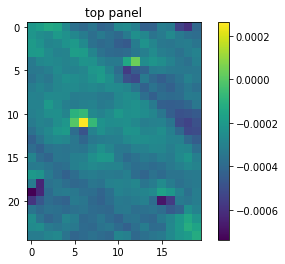

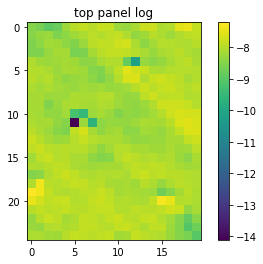

In [5]:
# now make our way down, top to bottom, and find the mean of different panels
# and unaffected surfaces
y = 150; x=430; h= 25; w=20;
topPanel = (x, y, w, h)
topPanelMean = surfaceZoom(diffData, diffDataLog, x, y, w, h, "top panel")

0.00014337109745346792


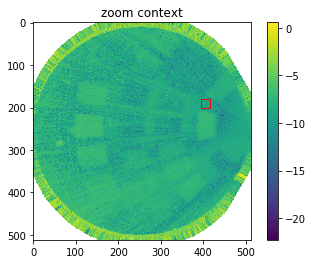

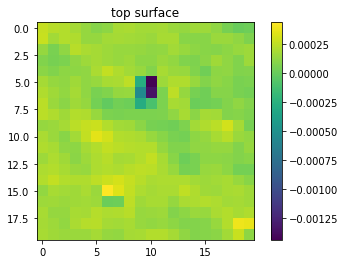

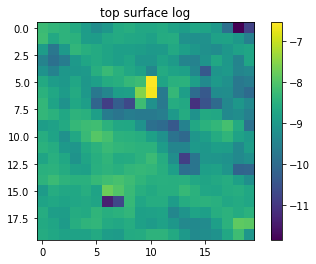

In [6]:
y=180; h=20; x=395; w=20;
topSurface = (x, y, w, h)
topSurfaceMean = surfaceZoom(diffData, diffDataLog, x, y, w, h, "top surface")
print topSurfaceMean


0.0008250688350659361


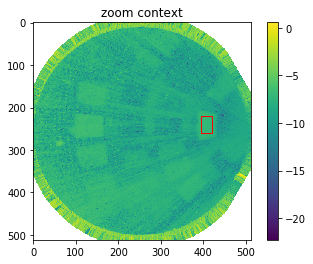

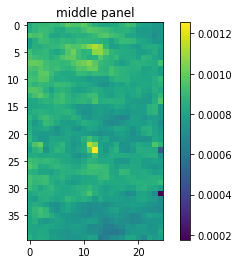

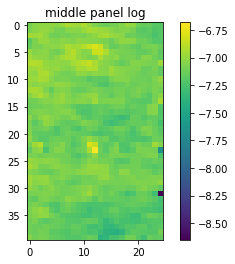

In [7]:
y=220; h=40; x=395; w=25
mdlPanel = (x, y, w, h)
mdlPanelMean = surfaceZoom(diffData, diffDataLog, x, y, w, h, "middle panel")
print mdlPanelMean

-0.00013717794925551983


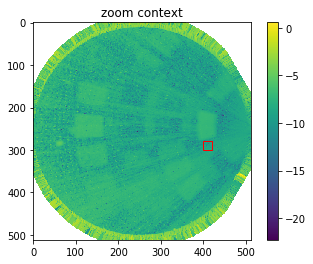

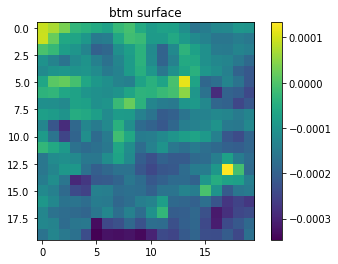

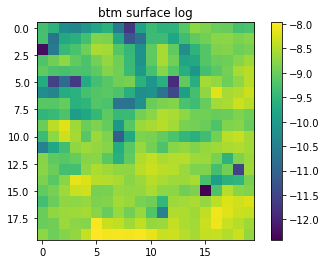

In [8]:
y=280; h=20; x=400; w=20
btmSurface = (x, y, w, h)
btmSurfaceMean = surfaceZoom(diffData, diffDataLog, x, y, w, h, "btm surface")
print btmSurfaceMean

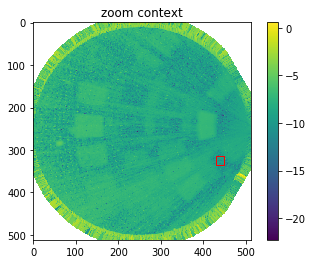

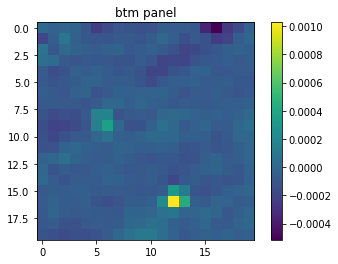

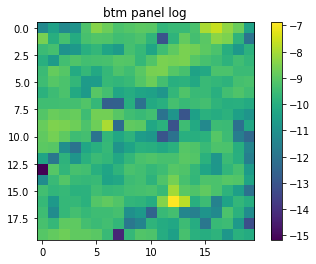

In [9]:
y=315; h=20; x=430; w=20
btmPanel = (x, y, w, h)
btmPanelMean = surfaceZoom(diffData, diffDataLog, x, y, w, h, "btm panel")

In [10]:
# now calculate the displacement as the difference between an affected panel area
# and it's neibhborring non-affected area
btmPanelDisp = (btmSurfaceMean - btmPanelMean)
# for the middle section, use both the parts above and below it
mdlPanelDisp1 = (btmSurfaceMean - mdlPanelMean)
mdlPanelDisp2 = (topSurfaceMean - mdlPanelMean)
topPanelDisp = (topSurfaceMean - topPanelMean)
print "Displacements, top to bottom: %e, %e, %e, %e" % (topPanelDisp, mdlPanelDisp1, mdlPanelDisp2, btmPanelDisp)

Displacements, top to bottom: 4.645726e-04, -9.622468e-04, -6.816977e-04, -7.788514e-05


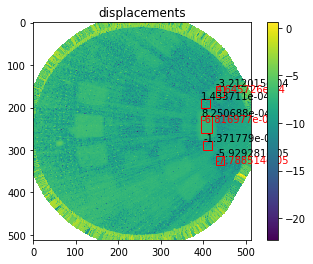

In [11]:
# now plot all these results togther
import matplotlib.patches as patches
f = plt.figure()
ax = f.gca()
cax = ax.imshow(diffDataLog)
plt.colorbar(cax)
plt.title("displacements")

boxes = [topPanel, topSurface, mdlPanel, btmSurface, btmPanel]
means = [topPanelMean, topSurfaceMean, mdlPanelMean, btmSurfaceMean, btmPanelMean]
disps = [topPanelDisp, None, mdlPanelDisp2, None, btmPanelDisp]
for i, box in enumerate(boxes):
    x, y, w, h = box
    rect = patches.Rectangle((x, y),w,h,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    plt.text(x, y, "%e" % means[i])
    if disps[i] is not None:
        plt.text(x, y+15, "%e" % disps[i], color='red')

## Conclusion
Assuming that we have some kind of mirroring going on (the top panel is actually the bottom panel), our results aren't too far off.
![bumps](bumpComparisonFinal.png)